# Parkinsons - No scale or transform

This was used to compare and work through the steps to make a machine learning model.  It was decided that using scaled or transformed data was better so we did not do analysis or interpretation in this section. It was mainly for understanding the process with relatable data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
# Reading in the data
test_X = pd.read_csv('test_X.csv')
display(test_X)
test_y = pd.read_csv('test_y.csv')
display(test_y)
train_X = pd.read_csv('train_X.csv')
display(train_X)
train_y = pd.read_csv('train_y.csv')
display(train_y)
val_X = pd.read_csv('val_X.csv')
display(val_X)
val_y = pd.read_csv('val_y.csv')
display(val_y)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,117.870,127.349,95.654,0.00647,0.000050,0.00356,0.00300,0.01067,0.03087,0.276,...,0.02402,0.04977,0.02631,22.431,0.628300,0.652025,-3.583722,0.207914,2.439597,0.206256
1,241.404,248.834,232.483,0.00281,0.000010,0.00157,0.00173,0.00470,0.01760,0.154,...,0.01251,0.03017,0.00675,23.145,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399
2,237.323,243.709,229.256,0.00303,0.000010,0.00173,0.00159,0.00519,0.01242,0.116,...,0.00882,0.02089,0.00533,24.679,0.384868,0.626710,-7.018057,0.176316,1.852402,0.091604
3,116.342,581.289,94.246,0.00267,0.000020,0.00115,0.00148,0.00345,0.01300,0.117,...,0.01144,0.01892,0.00680,25.023,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
4,124.445,135.069,117.495,0.00431,0.000030,0.00141,0.00167,0.00422,0.02184,0.197,...,0.01685,0.03724,0.00479,25.135,0.553134,0.775933,-6.650471,0.254498,1.840198,0.103561
5,202.544,241.350,164.168,0.00254,0.000010,0.00100,0.00133,0.00301,0.02662,0.228,...,0.02006,0.04426,0.01049,20.680,0.497480,0.630409,-6.132663,0.220617,2.576563,0.159777
6,122.964,130.049,114.676,0.00428,0.000030,0.00124,0.00155,0.00373,0.01681,0.154,...,0.01400,0.02789,0.00462,24.971,0.538688,0.754073,-6.482096,0.264967,2.054419,0.128872
7,116.879,131.897,108.153,0.00788,0.000070,0.00334,0.00493,0.01003,0.02645,0.265,...,0.02137,0.04183,0.00786,22.603,0.540049,0.813432,-4.476755,0.262633,1.827012,0.326197
8,193.030,208.900,80.297,0.00766,0.000040,0.00450,0.00389,0.01351,0.03044,0.275,...,0.02084,0.05312,0.00947,21.934,0.497554,0.740539,-5.845099,0.278679,2.608749,0.185668
9,125.791,140.557,96.206,0.01378,0.000110,0.00826,0.00655,0.02478,0.04689,0.422,...,0.03908,0.07625,0.10323,15.433,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375


,status
0,1
1,0
2,0
3,0
4,0
5,1
6,0
7,1
8,1
9,1


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,156.405,189.398,142.822,0.00768,0.000050,0.00372,0.00399,0.01116,0.03995,0.348,...,0.04310,0.05164,0.03365,17.153,0.649554,0.686080,-4.554466,0.340176,2.856676,0.322111
1,184.055,196.537,166.977,0.00258,0.000010,0.00134,0.00147,0.00403,0.01463,0.132,...,0.01234,0.02226,0.00257,26.453,0.306443,0.759203,-7.044105,0.063412,2.361532,0.115730
2,242.852,255.034,227.911,0.00225,0.000009,0.00117,0.00139,0.00350,0.01494,0.134,...,0.01014,0.02542,0.00476,25.032,0.431285,0.638928,-6.995820,0.102083,2.365800,0.102706
3,244.990,272.210,239.170,0.00451,0.000020,0.00279,0.00237,0.00837,0.01897,0.181,...,0.01255,0.03253,0.01049,21.528,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220
4,178.285,442.824,82.063,0.00462,0.000030,0.00157,0.00194,0.00472,0.01279,0.129,...,0.01151,0.01851,0.00856,25.020,0.470422,0.655239,-4.913137,0.393056,2.816781,0.251972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,198.764,396.961,74.904,0.00740,0.000040,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
172,186.695,211.961,149.442,0.01872,0.000100,0.01075,0.01154,0.03225,0.05830,0.784,...,0.06259,0.08096,0.10952,12.529,0.507826,0.762726,-4.484303,0.340256,2.958815,0.301487
173,106.516,112.777,93.105,0.00589,0.000060,0.00291,0.00319,0.00873,0.04932,0.441,...,0.03651,0.08050,0.03031,17.060,0.637814,0.744064,-5.301321,0.320385,2.375138,0.243080
174,96.106,108.664,84.510,0.00694,0.000070,0.00389,0.00415,0.01168,0.04024,0.364,...,0.02876,0.06799,0.01823,19.055,0.544805,0.770466,-4.441519,0.155097,2.645959,0.327978


,status
0,1
1,1
2,0
3,0
4,1
...,...
171,0
172,1
173,1
174,1


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,214.289,260.277,77.973,0.00567,0.000030,0.00295,0.00317,0.00885,0.01884,0.190,...,0.01373,0.03078,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569
1,116.286,177.291,96.983,0.00314,0.000030,0.00134,0.00192,0.00403,0.01564,0.136,...,0.01691,0.02001,0.00737,24.199,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
2,116.342,581.289,94.246,0.00267,0.000020,0.00115,0.00148,0.00345,0.01300,0.117,...,0.01144,0.01892,0.00680,25.023,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
3,197.569,217.627,90.794,0.00803,0.000040,0.00490,0.00448,0.01470,0.02177,0.189,...,0.01439,0.03836,0.01337,19.269,0.372222,0.725216,-5.736781,0.164529,2.882450,0.202879
4,163.656,200.841,76.779,0.00742,0.000050,0.00380,0.00390,0.01140,0.01659,0.164,...,0.01497,0.02214,0.01778,23.831,0.397937,0.732479,-5.557447,0.220890,2.692176,0.215961
5,116.286,177.291,96.983,0.00314,0.000030,0.00134,0.00192,0.00403,0.01564,0.136,...,0.01691,0.02001,0.00737,24.199,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
6,116.388,129.038,108.970,0.00346,0.000030,0.00169,0.00213,0.00507,0.01725,0.155,...,0.01331,0.02623,0.00415,26.143,0.361232,0.763242,-6.016891,0.109256,2.004719,0.174429
7,222.236,231.345,205.495,0.00266,0.000010,0.00152,0.00144,0.00457,0.01643,0.145,...,0.01200,0.02602,0.00340,25.856,0.364867,0.694399,-6.966321,0.095882,2.278687,0.103224
8,116.286,177.291,96.983,0.00314,0.000030,0.00134,0.00192,0.00403,0.01564,0.136,...,0.01691,0.02001,0.00737,24.199,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
9,176.170,185.604,163.564,0.00369,0.000020,0.00205,0.00218,0.00616,0.01851,0.168,...,0.01491,0.02814,0.00340,24.951,0.341435,0.783626,-6.006414,0.196371,2.536527,0.173218


,status
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,1


In [3]:
#use the Isolation Forest model to search for anomalies
from sklearn.ensemble import IsolationForest

df = pd.concat([train_X, train_y], axis=1)

# create the model
clf = IsolationForest(random_state=42, contamination=0.01)
#clf = IsolationForest(random_state=42, contamination=0.02)
anomaly_threshold = -0.5

clf.fit(train_X)

# create a column for the predictions
df['anomaly_score'] = clf.decision_function(train_X)
df['outlier'] = clf.predict(train_X)
anomaly_test = clf.decision_function(test_X)
anomalies_test = anomaly_test < anomaly_threshold
anomaly_val = clf.decision_function(val_X)
anomalies_val = anomaly_val < anomaly_threshold
train_out = df.loc[df['outlier']==-1].index


# show the number of outliers
print(df['outlier'].value_counts())
print(anomalies_test)
print(anomalies_val)
display(df.loc[df['outlier']==-1])

# Remove the outliers from the data
X_train_no_outliers = np.delete(train_X, train_out, axis=0)
y_train_no_outliers = np.delete(train_y, train_out)

/usr/local/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


outlier
 1    174
-1      2
Name: count, dtype: int64
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,anomaly_score,outlier
49,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,0.891,...,8.867,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961,1,-0.084057,-1
79,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,...,8.441,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367,1,-0.102646,-1


This shows that there are only 2 rows that contain outliers

In [4]:
train_X = train_X.values
#train_X = train_X.to_numpy()

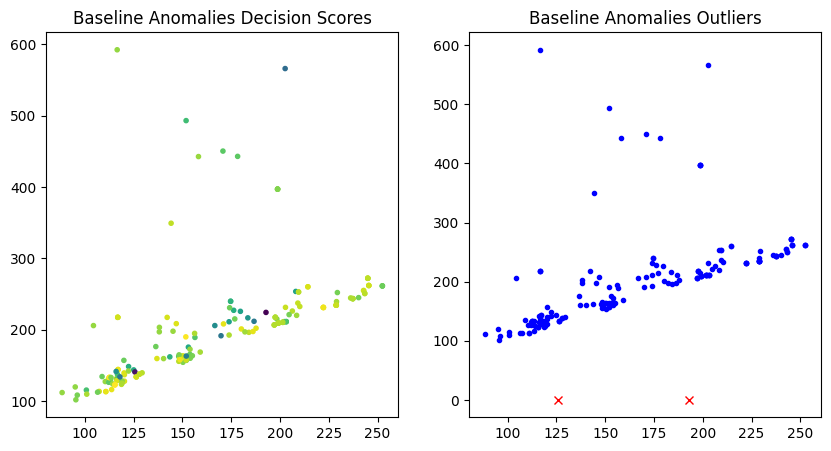

,Inlier Label,Inline Score,Outlier Label,Outline Score
0,1.0,0.170869,-1.0,-0.084057
1,1.0,0.236341,-1.0,-0.102646


In [5]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))

clf.fit(train_X)
predictions_X = clf.predict(train_X)

ax1.scatter(train_X[:, 0], train_X[:, 1], c=clf.decision_function(train_X), marker='.')
ax1.set_title('Baseline Anomalies Decision Scores')
ax2.plot(train_X[predictions_X==1][:,0], train_X[predictions_X==1][:,1], 'b.')
ax2.plot(train_X[predictions_X==-1][:,0], train_X[predictions_X==-1][:,-1], 'rx')
ax2.set_title('Baseline Anomalies Outliers')
plt.show()

df = pd.DataFrame(dict(predicted_label=clf.predict(train_X), score=clf.decision_function(train_X)))
outliers = df[df['predicted_label'] == -1].values
inliers = df[df['predicted_label'] == 1].head(len(outliers)).values
base_scores = pd.DataFrame(np.concatenate([inliers, outliers], axis=1), 
             columns=['Inlier Label', 'Inline Score', 'Outlier Label', 'Outline Score'])
display(base_scores)

In this model there were two outliers identified by Isolation Forest. Our other models also had two outliers, but the sometimes indices differ. They have less extreme outline scores. It has been determined that the models will be tested with data that has the outliers and one that doesn't to compare.

## Experimenting with Baseline data Outliers Intact

### Experimenting with PCA - Baseline

Component 1: Explained Variance 0.6606368881679228
Component 2: Explained Variance 0.9571081925854994
Component 3: Explained Variance 0.99838546531114
Component 4: Explained Variance 0.9999602337559582
Component 5: Explained Variance 0.9999913953001813
Component 6: Explained Variance 0.9999979516363117
Component 7: Explained Variance 0.9999989693989161
Component 8: Explained Variance 0.9999995960257057
Component 9: Explained Variance 0.9999998269094551
Component 10: Explained Variance 0.9999999273760014
Component 11: Explained Variance 0.9999999694834162
Component 12: Explained Variance 0.9999999935173737
Component 13: Explained Variance 0.9999999979421621
Component 14: Explained Variance 0.9999999990793271
Component 15: Explained Variance 0.9999999997356521
Component 16: Explained Variance 0.9999999999420786
Component 17: Explained Variance 0.9999999999789871
Component 18: Explained Variance 0.9999999999963803
Component 19: Explained Variance 0.9999999999999976
Component 20: Explained

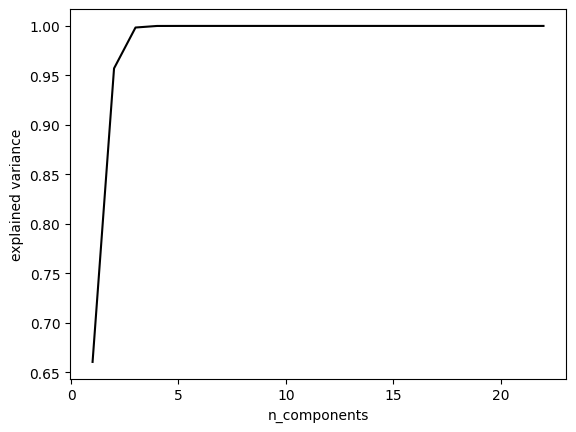

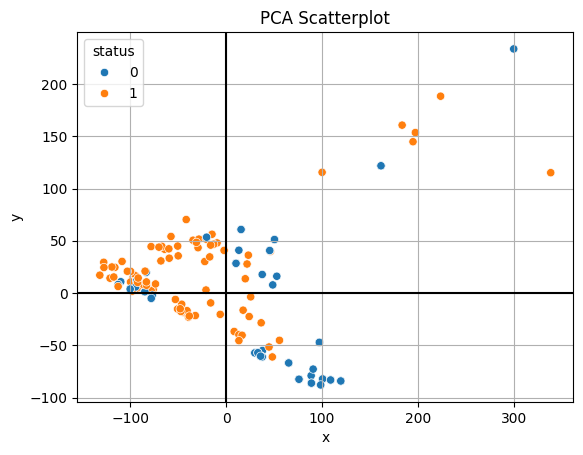

In [6]:
# use principal component analysis to determine categories for the data
from sklearn.decomposition import PCA
import seaborn as sns

# test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(train_X) for n in n_components]

# plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')

best_comp_base = None
max_expvar_base = 0.0

for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    if explained_variance > max_expvar_base:
        max_expvar_base = explained_variance
        best_comp_base = n_components[i]
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


# create the model
pca = PCA(n_components = 2)

# fit and transform the model
transformed = pca.fit_transform(train_X)

# create a dataframe of the transformed data
df = pd.DataFrame(transformed, columns=['x', 'y'])
df['status'] = train_y

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='status', data=df)

# make title
plt.title('PCA Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()


### Experimenting with Hierarchical Clustering for Feature Selection - Baseline

#### HC on Baseline

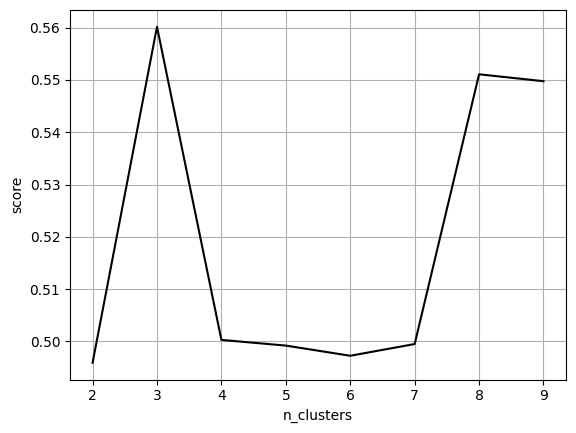

Cluster 2: Mean Silhouette Score: 0.49592432349015164
Cluster 3: Mean Silhouette Score: 0.5601586824121593
Cluster 4: Mean Silhouette Score: 0.5002950010305387
Cluster 5: Mean Silhouette Score: 0.4992101089778301
Cluster 6: Mean Silhouette Score: 0.4972656207047131
Cluster 7: Mean Silhouette Score: 0.4995082534738303
Cluster 8: Mean Silhouette Score: 0.5510756682353736
Cluster 9: Mean Silhouette Score: 0.5497540044738872


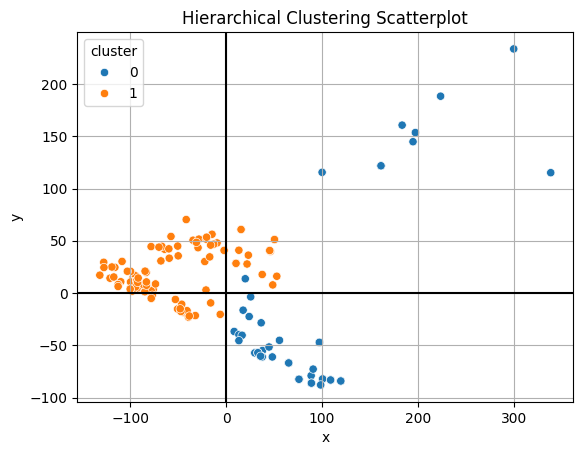

Hierarchical Clustering-Agglomerative NMI Score for PowerTransformer 0.1284264797567906


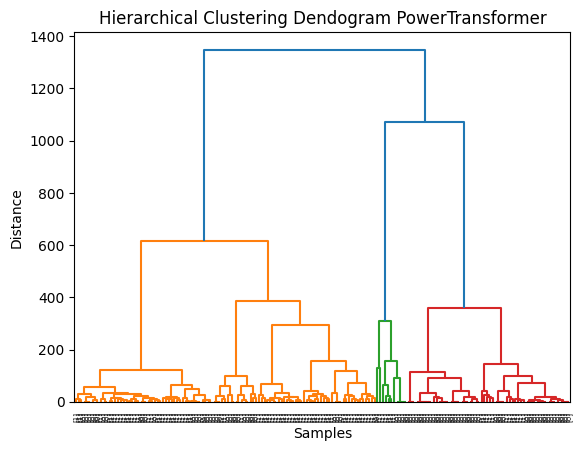

In [7]:
# create a hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

# find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(train_X) for n in n_clusters]

# plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(train_X, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

# fit the model
hi_model.fit(train_X, train_y)

# create a column for the cluster
df['cluster'] = hi_model.labels_

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='cluster', data=df)

# make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()

Z = linkage(train_X, method='ward')
#Z = linkage(train_X, method='average')
dendrogram(Z, labels=train_y.values)
plt.title('Hierarchical Clustering Dendogram PowerTransformer')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for PowerTransformer", 
      normalized_mutual_info_score(train_y.to_numpy().ravel(), df['cluster']))

This silloet score suggests that for this clustering method that doing either 3 or 8 clusters would be optimal.

#### HC on Baseline and PCA reduced

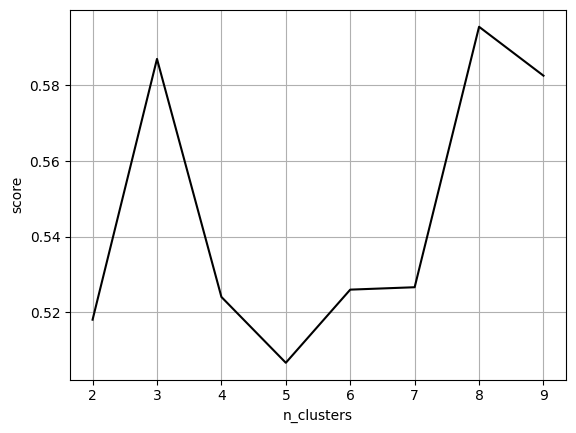

Cluster 2: Mean Silhouette Score: 0.5180710197077865
Cluster 3: Mean Silhouette Score: 0.5869952872269731
Cluster 4: Mean Silhouette Score: 0.5240843807898194
Cluster 5: Mean Silhouette Score: 0.5066808970421576
Cluster 6: Mean Silhouette Score: 0.5260149272666687
Cluster 7: Mean Silhouette Score: 0.5266483556162423
Cluster 8: Mean Silhouette Score: 0.5954904913823191
Cluster 9: Mean Silhouette Score: 0.5825634218821303


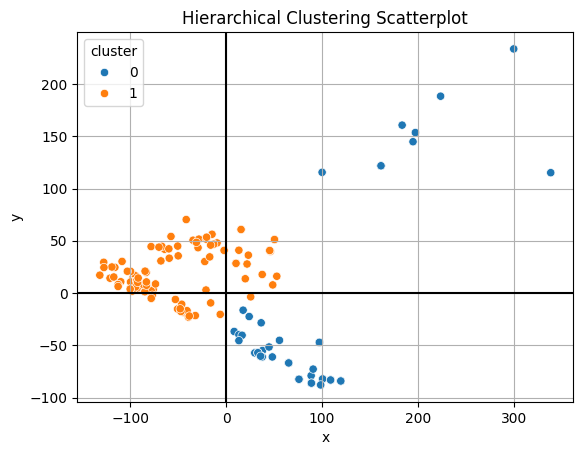

Hierarchical Clustering-Agglomerative NMI Score for PowerTransformer 0.14581928609965655


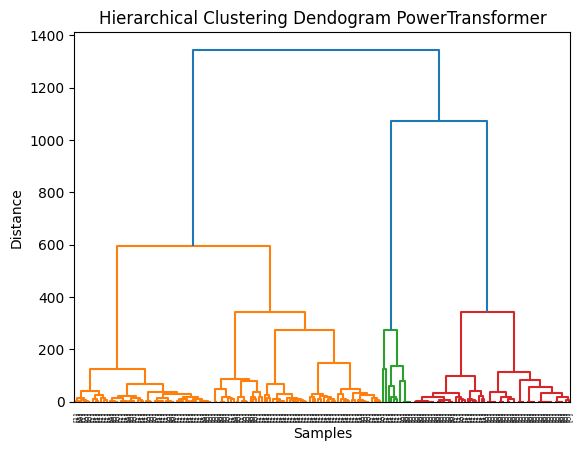

In [8]:
# create a hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

# find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(transformed) for n in n_clusters]

# plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(transformed, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

# fit the model
hi_model.fit(transformed, train_y)

# create a column for the cluster
df['cluster'] = hi_model.labels_

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='cluster', data=df)

# make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()

Z = linkage(transformed, method='ward')
#Z = linkage(transformed, method='average')
dendrogram(Z, labels=train_y.values)
plt.title('Hierarchical Clustering Dendogram PowerTransformer')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for PowerTransformer", 
      normalized_mutual_info_score(train_y.to_numpy().ravel(), df['cluster']))

### Logistic Regression - Baseline

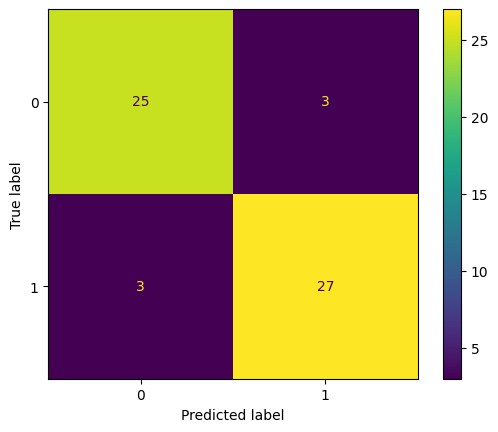

Accuracy:0.896551724137931
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.90      0.90      0.90        30

    accuracy                           0.90        58
   macro avg       0.90      0.90      0.90        58
weighted avg       0.90      0.90      0.90        58



In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.get_params()

pca = PCA(n_components = best_comp_base)
transformed = pca.fit_transform(train_X)

log_model.fit(transformed, train_y.to_numpy().ravel())
transformed_test = pca.transform(test_X.values)

predictions_base = log_model.predict(transformed_test)

cm_base = confusion_matrix(test_y, predictions_base, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(cm_base, display_labels=log_model.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predictions_base)
print(f'Accuracy:{accuracy}')
print(classification_report(test_y, predictions_base, labels=log_model.classes_))

### Decision Tree - Baseline

In [10]:
# create a decision tree based on the train set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create a decision tree classifier and PCA
dt = DecisionTreeClassifier(random_state=42)
dt.get_params()

pca = PCA(n_components = best_comp_base)

transformed_base = pca.fit_transform(train_X)

# fit the model
dt.fit(transformed_base, train_y)
transformed_test = pca.transform(test_X.values)

predict_pow_test = dt.predict(transformed_test)

accuracy = accuracy_score(test_y, predict_pow_test)
print(f'Accuracy of original model: {accuracy}')

Accuracy of original model: 0.8103448275862069


Depth:1 and Scores:0.75
Depth:2 and Scores:0.7611111111111112
Depth:3 and Scores:0.7954248366013073
Depth:4 and Scores:0.8516339869281044
Depth:5 and Scores:0.8803921568627452
Depth:6 and Scores:0.8921568627450981
Depth:7 and Scores:0.8866013071895426
Depth:8 and Scores:0.8921568627450981
Depth:9 and Scores:0.881045751633987
Depth:10 and Scores:0.881045751633987
Depth:11 and Scores:0.881045751633987
Depth:12 and Scores:0.881045751633987
Depth:13 and Scores:0.881045751633987
Depth:14 and Scores:0.881045751633987
Feature:1 and Scores:0.8689542483660132
Feature:2 and Scores:0.926797385620915
Feature:3 and Scores:0.8758169934640524
Feature:4 and Scores:0.8709150326797387
Feature:5 and Scores:0.9032679738562092
Feature:6 and Scores:0.8973856209150327
Feature:7 and Scores:0.9143790849673202
Feature:8 and Scores:0.8908496732026144
Feature:9 and Scores:0.9029411764705882
Feature:10 and Scores:0.8741830065359478
Feature:11 and Scores:0.9035947712418301
Feature:12 and Scores:0.9019607843137255
F

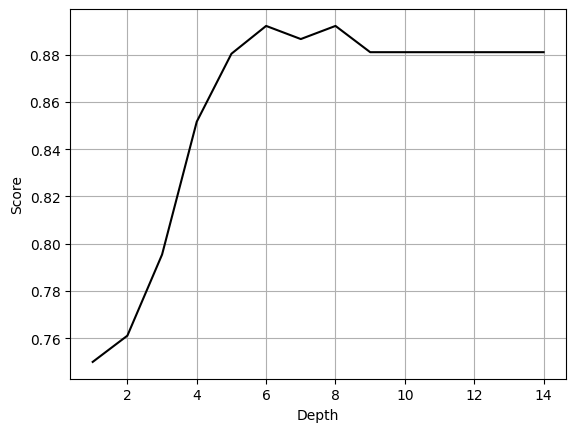

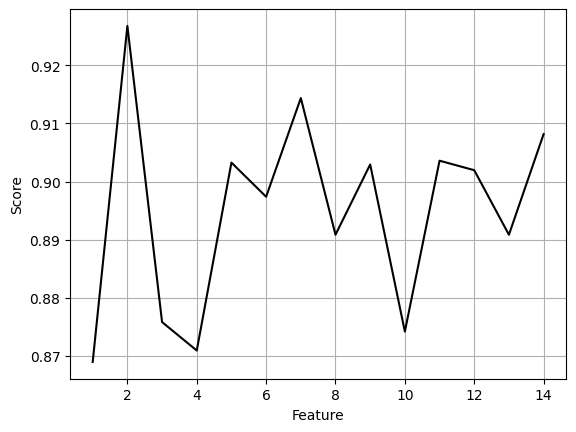

In [11]:
from sklearn.model_selection import cross_val_score
# Finding the best max depth and best max features this is modified code from the handouts.
dep, dscores =[], []
for d in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_depth=d)    
    dep.append(d)
    dscores.append(np.mean(cross_val_score(dt, transformed_base, train_y, scoring='accuracy', cv=10)))
    print(f'Depth:{d} and Scores:{dscores[-1]}')

feat, fscores =[], []
for f in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_features=f)    
    feat.append(f)
    fscores.append(np.mean(cross_val_score(dt, transformed_base, train_y, scoring='accuracy', cv=10)))
    print(f'Feature:{f} and Scores:{fscores[-1]}')
    

plt.plot(dep, dscores, color='black')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.grid()
plt.show()

plt.plot(feat, fscores, color='black')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.grid()
plt.show()

<Figure size 8000x2000 with 0 Axes>

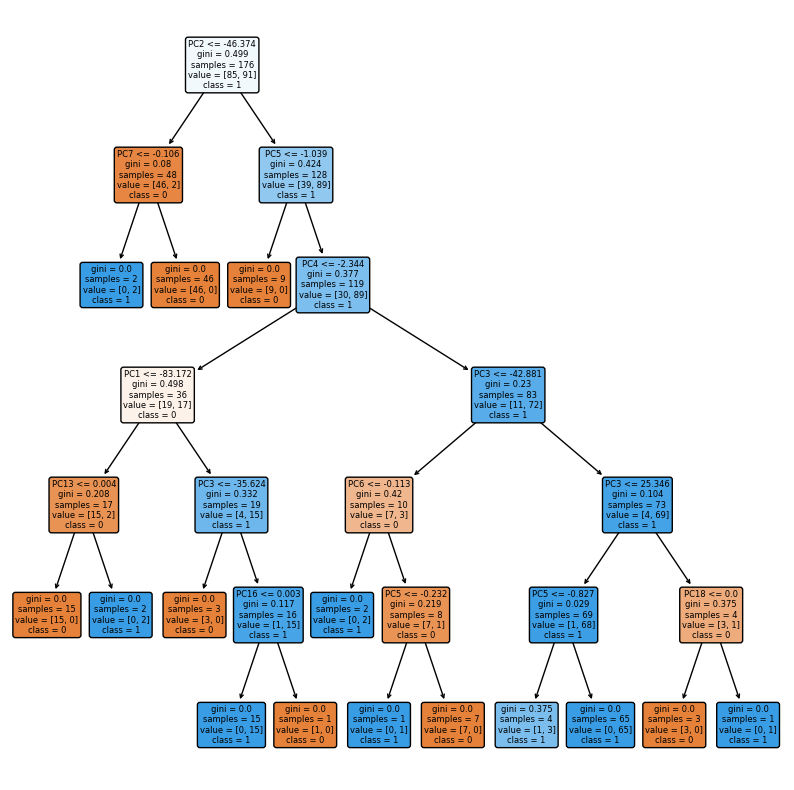

Best depth score: 6 and Best feature score: 2


In [12]:
from sklearn.tree import plot_tree, export_text

#Plotting the decision tree with the best max depth.
plt.figure(figsize =(80,20))

transformed_base = pca.fit_transform(train_X)

#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1, max_features=np.argmax(fscores)+1)
dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+1)

dt.fit(transformed_base, train_y)

plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, rounded=True, class_names=[str(i) for i in dt.classes_],
                                                      feature_names=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
plt.show()

print(f'Best depth score: {np.argmax(dscores) + 1} and Best feature score: {np.argmax(fscores)+1}')

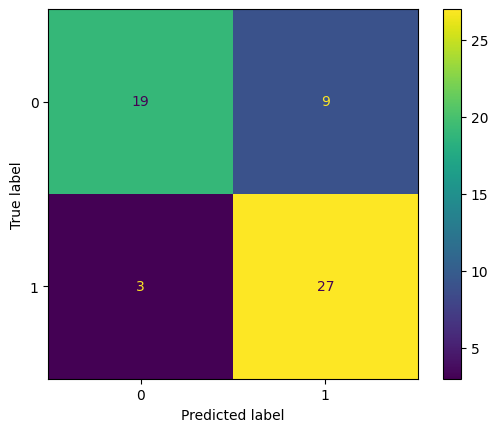

Accuracy of tuned model:0.7931034482758621


In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1, max_features=np.argmax(fscores)+1)
dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+1)

dt.fit(transformed_base, train_y)

predict_test = dt.predict(transformed_test)

cm_base = confusion_matrix(test_y, predict_test, labels=dt.classes_)
disp = ConfusionMatrixDisplay(cm_base, display_labels=dt.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predict_test)
print(f'Accuracy of tuned model:{accuracy}')

### Experimenting with SVM - Baseline Outliers Intact

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [15]:
train_y = train_y.to_numpy().ravel()

In [16]:
svc = SVC(random_state=42)

svc.fit(train_X,train_y)

accuracies = cross_val_score(svc,train_X,train_y,cv=5)
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(test_X.values,test_y))

Train Score: 0.7274603174603175
Test Score: 0.7586206896551724


#Creating an initial pipeline for just SVM
pipeline = Pipeline([
    ('svm', SVC(random_state=42))
])

#Defining the parameter grid for the grid search
param_grid = {
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Test different kernels
    'svm__C': [0.1, 1, 10],  # Test different values for the regularization parameter C
    'svm__degree': [2, 3, 4],  # Test different polynomial degrees for the 'poly' kernel
    'svm__gamma': ['scale', 'auto', 0.1, 1],  # Test different values for the 'rbf' and 'poly' kernels
}

#Performing a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_X, train_y)

#Getting the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#Making predictions on the test data using the best model
y_pred = best_model.predict(test_X.values)

#Evaluating the best model
accuracy = accuracy_score(test_y, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy with Best Model: {accuracy:.2f}')

#Get the best model from the pipeline
best_model = pipeline.named_steps['svm']

#Plot the decision boundary
plt.figure(figsize=(8, 6))

#Scatter plot of the training points
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.Paired)

#Plot the decision boundary
ax = plt.gca()

h = .02  
x_min, x_max = train_X[:, 0].min() - 1, train_X[:, 0].max() + 1
y_min, y_max = train_X[:, 1].min() - 1, train_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X = train_X[:, 0:2]
#Obtain decision boundary values
best_model.fit(X, train_y)
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

#Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdGy, alpha=0.8)

#Add labels and title
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

## Experimenting with Baseline data Outliers Removed

### Expirmenting with PCA - Baseline Outliers Removed

Component 1: Explained Variance 0.6598527990949395
Component 2: Explained Variance 0.9572273742194143
Component 3: Explained Variance 0.9986151569565296
Component 4: Explained Variance 0.9999618489553097
Component 5: Explained Variance 0.9999916371388726
Component 6: Explained Variance 0.9999981644019873
Component 7: Explained Variance 0.9999990107455574
Component 8: Explained Variance 0.9999996392902918
Component 9: Explained Variance 0.9999998627934649
Component 10: Explained Variance 0.9999999531419724
Component 11: Explained Variance 0.999999977752907
Component 12: Explained Variance 0.9999999947832051
Component 13: Explained Variance 0.9999999981597879
Component 14: Explained Variance 0.9999999991591121
Component 15: Explained Variance 0.9999999997489827
Component 16: Explained Variance 0.9999999999549011
Component 17: Explained Variance 0.999999999982236
Component 18: Explained Variance 0.9999999999966894
Component 19: Explained Variance 0.9999999999999978
Component 20: Explained

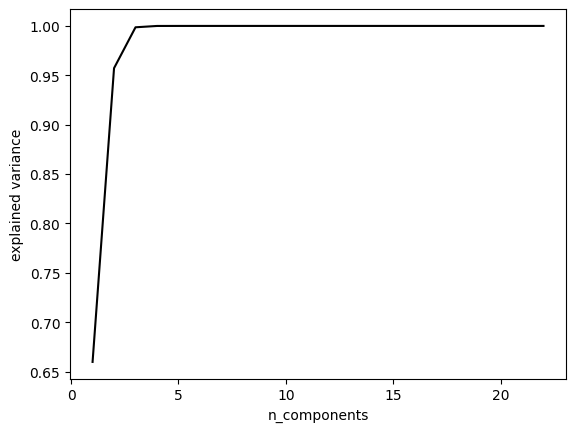

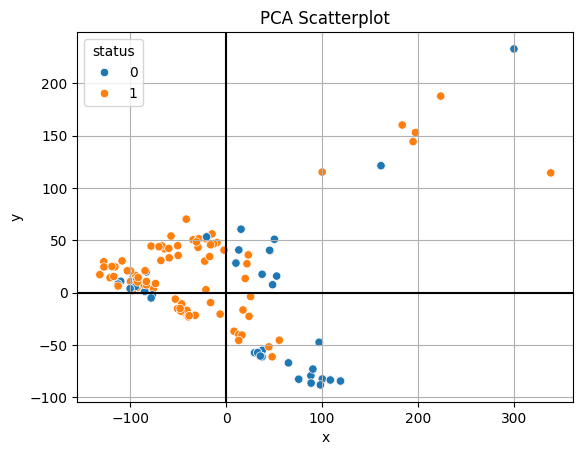

In [17]:
# use principal component analysis to determine categories for the data
from sklearn.decomposition import PCA
import seaborn as sns

# test n_number of components to find the best fit for the data
n_components = np.arange(1, 23)
models = [PCA(n).fit(X_train_no_outliers) for n in n_components]

# plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')

best_comp_base_no = None
max_expvar_base = 0.0

for i, model in enumerate(models):
    explained_variance = model.explained_variance_ratio_.sum()
    if explained_variance > max_expvar_base:
        max_expvar_base = explained_variance
        best_comp_base_no = n_components[i]
    print(f'Component {n_components[i]}: Explained Variance {explained_variance}')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


# create the model
pca = PCA(n_components = 2)

# fit and transform the model
transformed = pca.fit_transform(X_train_no_outliers)

# create a dataframe of the transformed data
df = pd.DataFrame(transformed, columns=['x', 'y'])
df['status'] = y_train_no_outliers

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='status', data=df)

# make title
plt.title('PCA Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()


## Experimenting with Hierarchical Clustering - Baseline Outliers Removed

#### HC on Baseline Outliers Removed

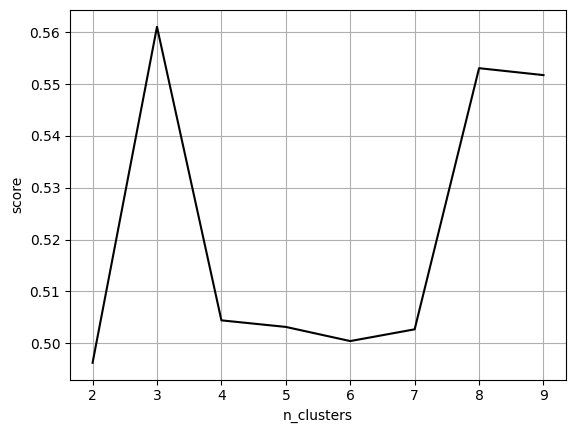

Cluster 2: Mean Silhouette Score: 0.4962072220903934
Cluster 3: Mean Silhouette Score: 0.5610765085119488
Cluster 4: Mean Silhouette Score: 0.5043986624111936
Cluster 5: Mean Silhouette Score: 0.5031305781596752
Cluster 6: Mean Silhouette Score: 0.5003985497271082
Cluster 7: Mean Silhouette Score: 0.5026669598843762
Cluster 8: Mean Silhouette Score: 0.5530825175078398
Cluster 9: Mean Silhouette Score: 0.5517456622088652


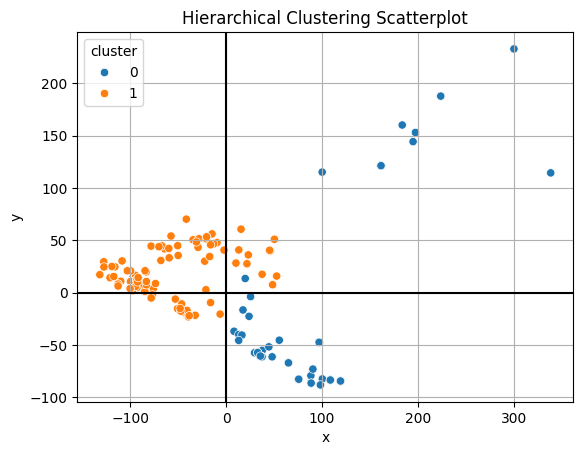

Hierarchical Clustering-Agglomerative NMI Score for Baseline 0.1334635866565009


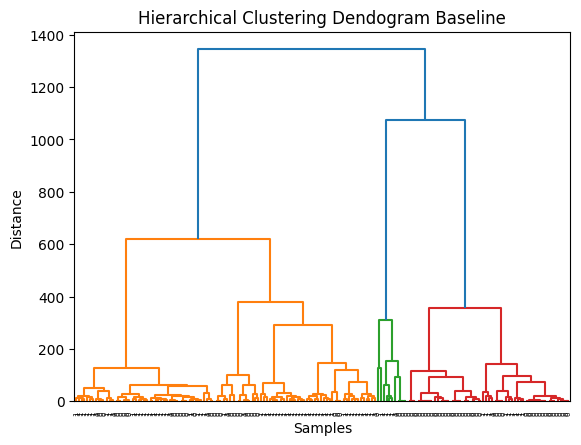

In [18]:
# create a hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

# find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(X_train_no_outliers) for n in n_clusters]

# plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(X_train_no_outliers, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

# fit the model
hi_model.fit(X_train_no_outliers)

# create a column for the cluster
df['cluster'] = hi_model.labels_

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='cluster', data=df)

# make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()

Z = linkage(X_train_no_outliers, method='ward')
#Z = linkage(train_X, method='average')
dendrogram(Z, labels=y_train_no_outliers)
plt.title('Hierarchical Clustering Dendogram Baseline')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for Baseline", 
      normalized_mutual_info_score(y_train_no_outliers, df['cluster']))

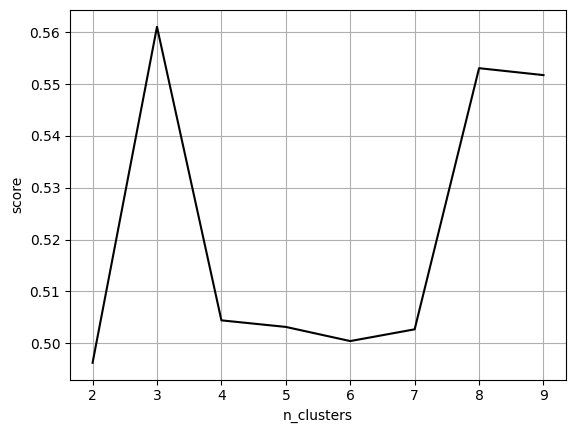

Cluster 2: Mean Silhouette Score: 0.4962072220903934
Cluster 3: Mean Silhouette Score: 0.5610765085119488
Cluster 4: Mean Silhouette Score: 0.5043986624111936
Cluster 5: Mean Silhouette Score: 0.5031305781596752
Cluster 6: Mean Silhouette Score: 0.5003985497271082
Cluster 7: Mean Silhouette Score: 0.5026669598843762
Cluster 8: Mean Silhouette Score: 0.5530825175078398
Cluster 9: Mean Silhouette Score: 0.5517456622088652


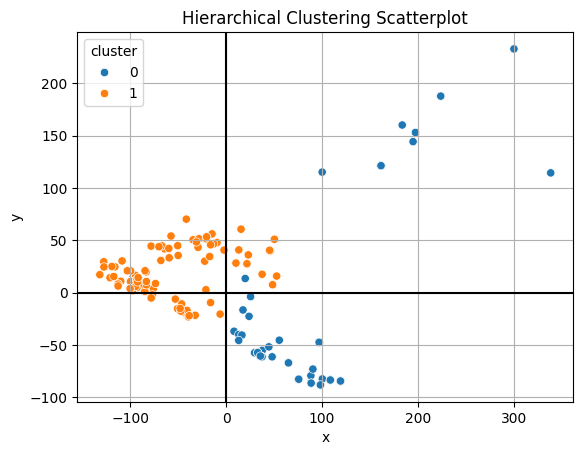

Hierarchical Clustering-Agglomerative NMI Score for Baseline 0.1334635866565009


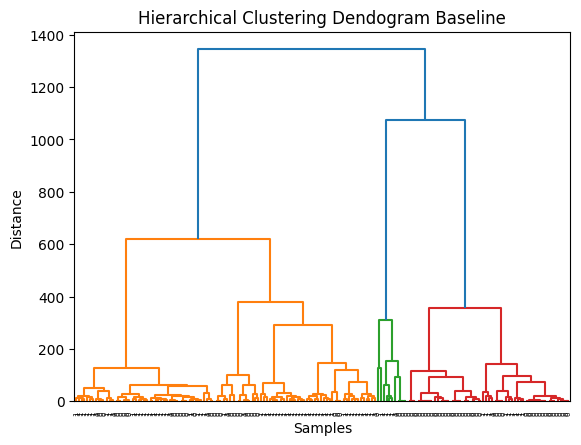

In [19]:
# create a hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import normalized_mutual_info_score

# find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(X_train_no_outliers) for n in n_clusters]

# plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(X_train_no_outliers, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

for i, clust_num in enumerate(n_clusters):
    mean_score = scores[i].mean()
    print(f"Cluster {clust_num}: Mean Silhouette Score: {mean_score}")

#create the model
hi_model = AgglomerativeClustering(n_clusters=2)
#hi_model = AgglomerativeClustering(n_clusters=3)

# fit the model
hi_model.fit(X_train_no_outliers)

# create a column for the cluster
df['cluster'] = hi_model.labels_

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='cluster', data=df)

# make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()

Z = linkage(X_train_no_outliers, method='ward')
#Z = linkage(train_X, method='average')
dendrogram(Z, labels=y_train_no_outliers)
plt.title('Hierarchical Clustering Dendogram Baseline')
plt.xlabel('Samples')
plt.ylabel('Distance')

print("Hierarchical Clustering-Agglomerative NMI Score for Baseline", 
      normalized_mutual_info_score(y_train_no_outliers, df['cluster']))

### Experimenting with Logistic Regression - Baseline Outliers Removed

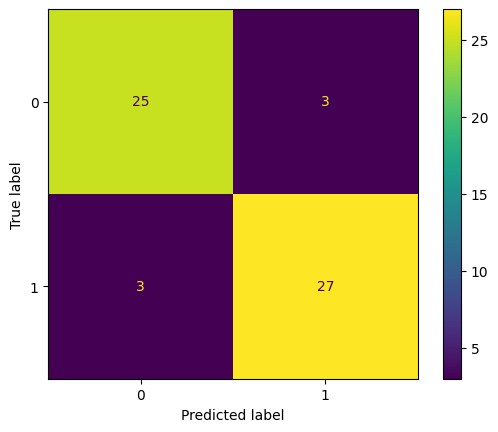

Accuracy:0.896551724137931
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.90      0.90      0.90        30

    accuracy                           0.90        58
   macro avg       0.90      0.90      0.90        58
weighted avg       0.90      0.90      0.90        58



In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.get_params()

pca = PCA(n_components = best_comp_base_no)
transformed_base_no = pca.fit_transform(X_train_no_outliers)

log_model.fit(transformed_base_no, y_train_no_outliers)
transformed_test = pca.transform(test_X.values)

predictions_base_no = log_model.predict(transformed_test)

cm_base_no = confusion_matrix(test_y, predictions_base_no, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(cm_base_no, display_labels=log_model.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predictions_base_no)
print(f'Accuracy:{accuracy}')
print(classification_report(test_y, predictions_base_no, labels=log_model.classes_))

### Decision Tree - Baseline Outliers Removed

In [21]:
# create a decision tree based on the train set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create a decision tree classifier and PCA
dt = DecisionTreeClassifier(random_state=42)
dt.get_params()

pca = PCA(n_components = best_comp_base_no)

transformed_base_no = pca.fit_transform(X_train_no_outliers)

# fit the model
dt.fit(transformed_base_no, y_train_no_outliers)
transformed_test = pca.transform(test_X.values)

predict_base_test = dt.predict(transformed_test)

accuracy = accuracy_score(test_y, predict_base_test)
print(f'Accuracy of original model: {accuracy}')

Accuracy of original model: 0.8620689655172413


Depth:1 and Scores:0.746078431372549
Depth:2 and Scores:0.746078431372549
Depth:3 and Scores:0.8094771241830067
Depth:4 and Scores:0.8431372549019608
Depth:5 and Scores:0.9009803921568628
Depth:6 and Scores:0.9241830065359478
Depth:7 and Scores:0.9068627450980392
Depth:8 and Scores:0.9127450980392157
Depth:9 and Scores:0.9068627450980392
Depth:10 and Scores:0.9068627450980392
Depth:11 and Scores:0.9068627450980392
Depth:12 and Scores:0.9068627450980392
Depth:13 and Scores:0.9068627450980392
Depth:14 and Scores:0.9068627450980392
Feature:1 and Scores:0.815686274509804
Feature:2 and Scores:0.8506535947712418
Feature:3 and Scores:0.8571895424836601
Feature:4 and Scores:0.8676470588235293
Feature:5 and Scores:0.9075163398692812
Feature:6 and Scores:0.8954248366013072
Feature:7 and Scores:0.8898692810457517
Feature:8 and Scores:0.8732026143790849
Feature:9 and Scores:0.9300653594771242
Feature:10 and Scores:0.9254901960784314
Feature:11 and Scores:0.8960784313725491
Feature:12 and Scores:0.

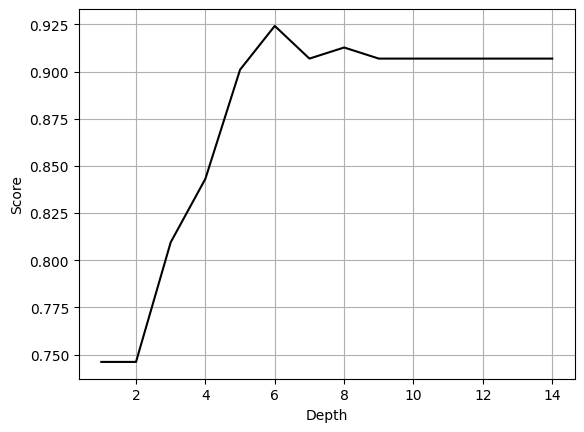

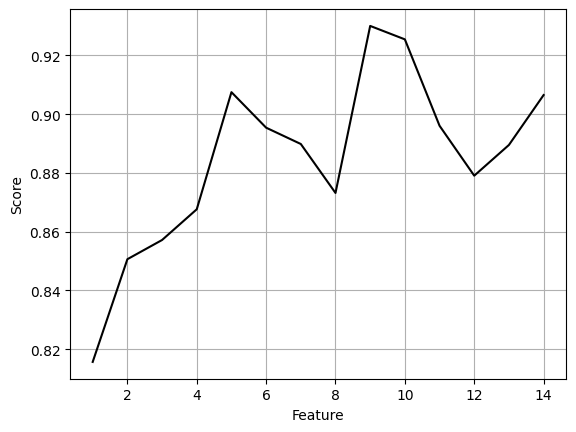

In [22]:
from sklearn.model_selection import cross_val_score
# Finding the best max depth and best max features this is modified code from the handouts.
dep, dscores =[], []
for d in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_depth=d)    
    dep.append(d)
    dscores.append(np.mean(cross_val_score(dt, transformed_base_no, y_train_no_outliers, scoring='accuracy', cv=10)))
    print(f'Depth:{d} and Scores:{dscores[-1]}')

feat, fscores =[], []
for f in range(1,15):
    dt = DecisionTreeClassifier(random_state=42, max_features=f)    
    feat.append(f)
    fscores.append(np.mean(cross_val_score(dt, transformed_base_no, y_train_no_outliers, scoring='accuracy', cv=10)))
    print(f'Feature:{f} and Scores:{fscores[-1]}')
    

plt.plot(dep, dscores, color='black')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.grid()
plt.show()

plt.plot(feat, fscores, color='black')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.grid()
plt.show()

<Figure size 8000x2000 with 0 Axes>

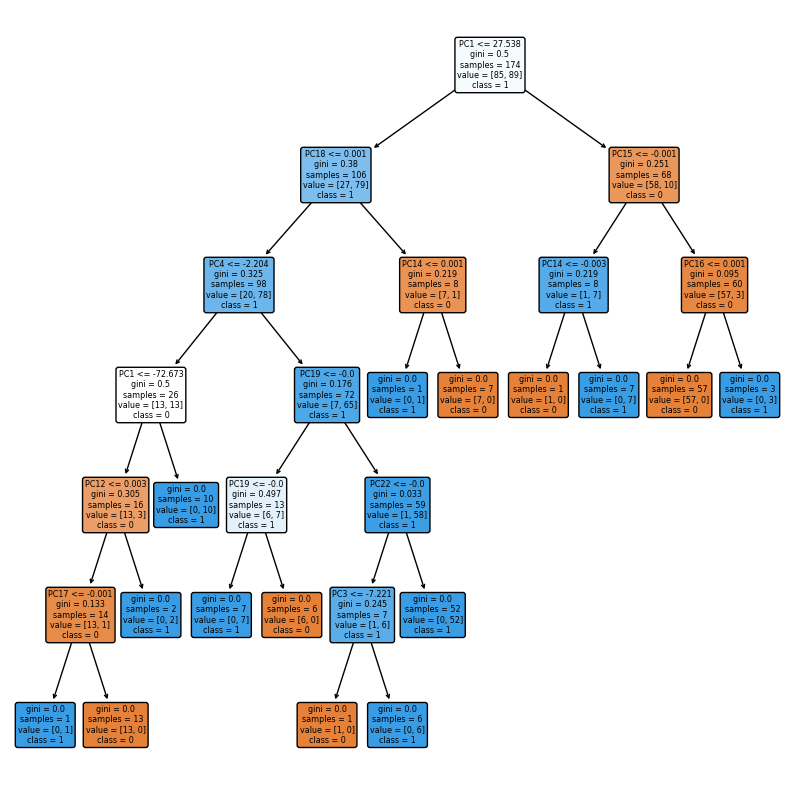

Best depth score: 6 and Best feature score: 9


In [23]:
from sklearn.tree import plot_tree, export_text

#Plotting the decision tree with the best max depth.
plt.figure(figsize =(80,20))

transformed_base_no = pca.fit_transform(X_train_no_outliers)

dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1, max_features=np.argmax(fscores)+1)
#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+1)

dt.fit(transformed_base_no, y_train_no_outliers)

plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, rounded=True, class_names=[str(i) for i in dt.classes_],
                                                      feature_names=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
plt.show()

print(f'Best depth score: {np.argmax(dscores) + 1} and Best feature score: {np.argmax(fscores)+1}')

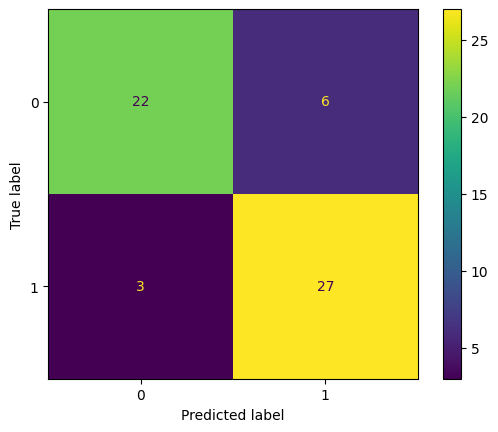

Accuracy of tuned model:0.8448275862068966


In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1, max_features=np.argmax(fscores)+1)
dt = DecisionTreeClassifier(random_state=42, max_depth=np.argmax(dscores) + 1)
#dt = DecisionTreeClassifier(random_state=42, max_features=np.argmax(fscores)+1)

dt.fit(transformed_base_no, y_train_no_outliers)

predict_test = dt.predict(transformed_test)

cm_base_no = confusion_matrix(test_y, predict_test, labels=dt.classes_)
disp = ConfusionMatrixDisplay(cm_base_no, display_labels=dt.classes_)
disp.plot()
plt.show()

accuracy = accuracy_score(test_y, predict_test)
print(f'Accuracy of tuned model:{accuracy}')

### SVM - Baseline Outliers Removed

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [26]:
y_train_no_outliers = y_train_no_outliers.ravel()

In [27]:
svc = SVC(random_state=42)

svc.fit(X_train_no_outliers,y_train_no_outliers)

accuracies = cross_val_score(svc,X_train_no_outliers,y_train_no_outliers,cv=5)
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(test_X.values,test_y))

Train Score: 0.7240336134453782
Test Score: 0.7413793103448276


#Creating an initial pipeline for just SVM
pipeline = Pipeline([
    ('svm', SVC(random_state=42))
])

#Defining the parameter grid for the grid search
param_grid = {
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Test different kernels
    'svm__C': [0.1, 1, 10],  # Test different values for the regularization parameter C
    'svm__degree': [2, 3, 4],  # Test different polynomial degrees for the 'poly' kernel
    'svm__gamma': ['scale', 'auto', 0.1, 1],  # Test different values for the 'rbf' and 'poly' kernels
}

#Performing a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_no_outliers, y_train_no_outliers)

#Getting the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#Making predictions on the test data using the best model
y_pred = best_model.predict(test_X.values)

#Evaluating the best model
accuracy = accuracy_score(test_y, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy with Best Model: {accuracy:.2f}')

#Get the best model from the pipeline
best_model = pipeline.named_steps['svm']

#Plot the decision boundary
plt.figure(figsize=(8, 6))

#Scatter plot of the training points
plt.scatter(X_train_no_outliers[:, 0], X_train_no_outliers[:, 1], c=y_train_no_outliers, cmap=plt.cm.Paired)

#Plot the decision boundary
ax = plt.gca()

h = .02  
x_min, x_max = X_train_no_outliers[:, 0].min() - 1, X_train_no_outliers[:, 0].max() + 1
y_min, y_max = X_train_no_outliers[:, 1].min() - 1, X_train_no_outliers[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X = X_train_no_outliers[:, 0:2]
#Obtain decision boundary values
best_model.fit(X_train_no_outliers, y_train_no_outliers)
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

#Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdGy, alpha=0.8)

#Add labels and title
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()